In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
dataset=pd.read_csv("Position_Salaries.csv")

In [81]:
X=dataset.iloc[:, 1:-1].values
y=dataset.iloc[:, -1].values

In [82]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [83]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [84]:
y=y.reshape(len(y),1)

In [85]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
SS_X=StandardScaler()
SS_y=StandardScaler()
X=SS_X.fit_transform(X)
y=SS_y.fit_transform(y)

In [88]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [89]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training SVR model for the whole dataset

In [90]:
from sklearn.svm import SVR

In [91]:
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [92]:
SS_y.inverse_transform(regressor.predict(SS_X.transform([[6.5]])))

array([170370.0204065])

# Visualisation of SVR

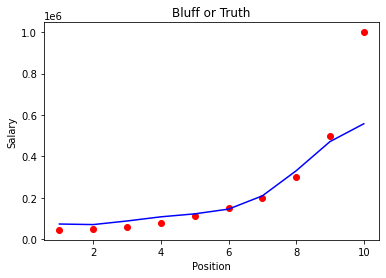

In [96]:
plt.scatter(SS_X.inverse_transform(X), SS_y.inverse_transform(y), color = 'red')
plt.plot(SS_X.inverse_transform(X), SS_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Bluff or Truth')
plt.show()

# Visualisation of SVR for higher Resolution and smoother curve

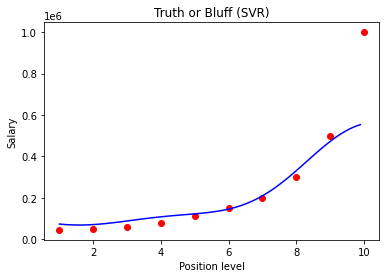

In [99]:
X_grid = np.arange(min(SS_X.inverse_transform(X)), max(SS_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(SS_X.inverse_transform(X), SS_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, SS_y.inverse_transform(regressor.predict(SS_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()